In [54]:

import numpy as np                             # for multi-dimensional containers
import pandas as pd                            # for DataFrames
import platypus as plat                        # multi-objective optimisation framework
import matplotlib.pyplot as plt

D = 30
x = np.random.random((100,D)) #100个样本
def ZDT2(x):
    f1 = x[0]  # objective 1
    g = 1 + 9 * np.sum(x[1:D] / (D - 1))
    h = 1 - (f1 / g) ** 2
    f2 = g * h  # objective 2
    return [f1, f2]
objective_values = []
for i in range(x.shape[0]):
    objective_values.append(ZDT2(x[i]))
print(objective_values)

[[0.8453534495790404, 5.649053527872247], [0.3982621886638361, 5.707789978579832], [0.7519962672441473, 5.885941147197307], [0.4437535038180339, 5.903580454182459], [0.2698120733837316, 4.688087122430532], [0.45873319069464513, 5.7618495611675264], [0.8830212270171455, 4.58528843623962], [0.3290066635595542, 5.8240636818211415], [0.017020349471889018, 5.655170009360127], [0.919402021243069, 4.883742849627931], [0.42895116049721094, 4.624168434018575], [0.16221258987857523, 5.486763398805097], [0.2562177205595706, 5.51708803021389], [0.24738377177345783, 5.7968190116440095], [0.7984462159328827, 5.447307673184898], [0.20612164060315752, 5.8192541278979], [0.34547153621273874, 5.347675228336174], [0.9910601681129682, 5.022907829707613], [0.02732684551309139, 5.452574721206887], [0.6623142970353302, 4.999341503173545], [0.8864379921791656, 5.541378516907233], [0.16685975111879447, 5.4379416521367006], [0.17191264185130395, 5.3393953050656915], [0.8131112061708142, 5.6846293794603655], [0.

In [55]:
objective_values = np.array(objective_values)
objective_values

array([[8.45353450e-01, 5.64905353e+00],
       [3.98262189e-01, 5.70778998e+00],
       [7.51996267e-01, 5.88594115e+00],
       [4.43753504e-01, 5.90358045e+00],
       [2.69812073e-01, 4.68808712e+00],
       [4.58733191e-01, 5.76184956e+00],
       [8.83021227e-01, 4.58528844e+00],
       [3.29006664e-01, 5.82406368e+00],
       [1.70203495e-02, 5.65517001e+00],
       [9.19402021e-01, 4.88374285e+00],
       [4.28951160e-01, 4.62416843e+00],
       [1.62212590e-01, 5.48676340e+00],
       [2.56217721e-01, 5.51708803e+00],
       [2.47383772e-01, 5.79681901e+00],
       [7.98446216e-01, 5.44730767e+00],
       [2.06121641e-01, 5.81925413e+00],
       [3.45471536e-01, 5.34767523e+00],
       [9.91060168e-01, 5.02290783e+00],
       [2.73268455e-02, 5.45257472e+00],
       [6.62314297e-01, 4.99934150e+00],
       [8.86437992e-01, 5.54137852e+00],
       [1.66859751e-01, 5.43794165e+00],
       [1.71912642e-01, 5.33939531e+00],
       [8.13111206e-01, 5.68462938e+00],
       [6.157369

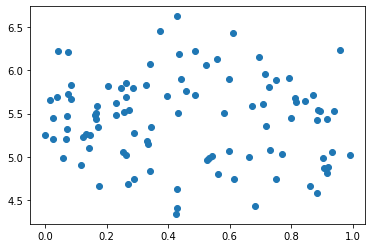

In [57]:
plt.scatter(objective_values[:,0], objective_values[:,1])
plt.show() #展示的是100个随机样本输入函数的目标值

In [36]:
import numpy as np                             # for multi-dimensional containers
import pandas as pd                            # for DataFrames
import platypus as plat                        # multi-objective optimisation framework
import matplotlib.pyplot as plt

In [44]:
true_front = np.empty((0, 2))

for f1 in np.linspace(0, 1, num=20):
    f2 = 1 - (f1 ** 2)
    true_front = np.vstack([true_front, [f1, f2]])

true_front_df = pd.DataFrame(true_front, columns=['f1', 'f2'])  # convert to DataFrame

In [45]:
problem = plat.ZDT2()
algorithm_nsga2 = plat.NSGAII(problem)
algorithm_omopso = plat.OMOPSO(problem, epsilons=[0.05])
# (plat.OMOPSO, {"epsilons": [0.05]})

algorithm_nsga2.run(10000)
algorithm_omopso.run(10000)

# for solution in algorithm.result:
#     print(solution.objectives)
#
# print('\n')
#
# for solution in algorithm1.result:
#     print(solution.objectives)

In [46]:
objective_values_nsga2 = np.empty((0, 2))
for solution in algorithm_nsga2.result:
    y = solution.objectives
    #print(y)  [0.0003397147438311196, 2.959534678583674]
    #[0.01489028917061852, 2.4640591186530667]
    objective_values_nsga2 = np.vstack([objective_values_nsga2, y])
#print(objective_values_nsga2) 

In [47]:
objective_values_omopso = np.empty((0, 2))
for solution in algorithm_omopso.result:
    y = solution.objectives
    #print(y)  [0.0003397147438311196, 2.959534678583674]
    #[0.01489028917061852, 2.4640591186530667]
    objective_values_omopso = np.vstack([objective_values_omopso, y])
print(objective_values_omopso)

[[0.990229   0.02040298]
 [0.         1.00196716]
 [0.47574469 0.77626481]
 [0.22972461 0.94990588]
 [0.3972505  0.84789856]
 [0.64510253 0.58631262]
 [0.59868303 0.6473741 ]
 [0.69000595 0.52588563]
 [0.07768056 0.99847474]
 [0.52545109 0.72695481]
 [0.78788999 0.38125449]
 [0.9389749  0.11853494]
 [0.84915794 0.28330771]
 [0.33206865 0.89375812]
 [0.74655801 0.44496331]
 [0.88772834 0.21423539]]


In [48]:
# convert to DataFrame
objective_values_nsga2_df = pd.DataFrame(objective_values_nsga2, columns=['f1', 'f2'])
objective_values_nsga2_df.head()

,f1,f2
0,2.207037e-16,1.003777
1,5.562817e-01,0.697585
2,5.211447e-01,0.734584
3,4.586607e-01,0.795553
4,5.552259e-01,0.698471


In [49]:
objective_values_omopso_df = pd.DataFrame(objective_values_omopso, columns=['f1', 'f2'])
objective_values_omopso_df.head()

,f1,f2
0,0.990229,0.020403
1,0.000000,1.001967
2,0.475745,0.776265
3,0.229725,0.949906
4,0.397250,0.847899


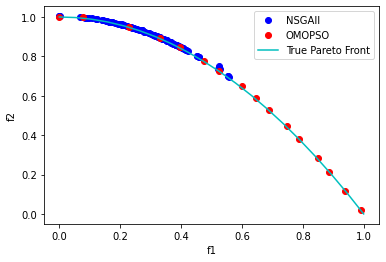

In [58]:
plt.plot(objective_values_nsga2_df.f1, objective_values_nsga2_df.f2, 'bo', label='NSGAII')
plt.plot(objective_values_omopso_df.f1, objective_values_omopso_df.f2, 'ro', label='OMOPSO')
plt.plot(true_front_df.f1, true_front_df.f2, 'c-', label='True Pareto Front')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.show()